# Clustering

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances

import nltk
import string

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')


In [30]:
x = [['distance', 'sensor', 'ultrasonic'],
 ['display'],
 ['assistive-technology',
  'automation',
  'manufacturing',
  'robot-arm',
  'robotics'],
 ['computer-vision', 'health', 'internet-of-things', 'machine-learning'],
 ['display', 'embedded', 'fpga', 'image-processing'],
 ['home-automation'],
 ['display'],
 ['display'],
 ['internet-of-things', 'smartphone'],
 ['drones', 'games', 'remote-control', 'robotics', 'toys'],
 ['arduino-rover',
  'autonomous',
  'home-automation',
  'probability',
  'robot',
  'rover'],
 ['glove-control', 'hand', 'remote-control', 'robot', 'robotics'],
 ['display', 'distance', 'food-and-drinks', 'relay'],
 ['bluetooth', 'robot', 'robotics', 'rover'],
 ['computer-vision', 'home-automation', 'security'],
 ['display', 'internet-of-things', 'windows-10'],
 ['humidity', 'internet-of-things', 'monitoring', 'temperature'],
 ['garden', 'internet-of-things', 'remote-control'],
 ['display', 'smart-appliances', 'soldering', 'soldering-hack'],
 ['home-automation', 'smart-appliances'],
 ['internet-of-things', 'monitoring', 'weather'],
 ['environmental-sensing', 'home-automation', 'tracking'],
 ['display', 'games', 'touchscreen'],
 ['christmas', 'gift', 'home-automation'],
 ['home-automation', 'security', 'smart-appliances'],
 ['animals', 'pets', 'robotics', 'walking'],
 ['clocks', 'internet-of-things', 'kids', 'weather'],
 ['led', 'sensor'],
 ['air-quality',
  'environmental-protection',
  'environmental-sensing',
  'maps',
  'monitoring'],
 ['animals', 'animatronic', 'companion-bot', 'robotics', 'wearables'],
 ['home-automation', 'internet-of-things', 'security'],
 ['home-automation', 'infrared', 'remote-control', 'wireless'],
 ['digital-signage-win10',
  'environmental-sensing',
  'healthcare-win10',
  'industrial-automation-win10'],
 ['robot-arm', 'robotics'],
 ['home-automation', 'irrigation', 'plants', 'voice-control'],
 ['artificial-intelligence',
  'car',
  'computer-vision',
  'monitoring',
  'robotics'],
 ['3d-printing',
  'home-automation',
  'remote-control',
  'robot-arm',
  'wireless-communication'],
 ['environmental-sensing', 'monitoring', 'water'],
 ['artificial-intelligence',
  'computer-vision',
  'home-automation',
  'image-processing',
  'machine-learning'],
 ['display', 'wearables'],
 ['home-automation', 'time-lapse'],
 ['energy-win10',
  'environmental-sensing',
  'industrial-automation-win10',
  'security-win10',
  'smart-building-win10'],
 ['embedded', 'internet-of-things', 'wifi'],
 ['3d-printing', 'motor', 'robotics', 'stepper'],
 ['drones', 'robot', 'robotics'],
 ['industrial-automation-win10', 'internet-of-things', 'robotics', 'rover'],
 ['mobile-app', 'smart-appliances', 'wearables', 'wifi'],
 ['dht22', 'environmental-sensing', 'humidity', 'temperature', 'weather'],
 ['bluetooth-low-energy', 'geolocation', 'home-automation', 'lora', 'sensor'],
 ['agriculture', 'automation', 'farming', 'robotics', 'water-level'],
 ['door', 'gate', 'home-automation', 'lights', 'mobile-app'],
 ['internet-of-things', 'monitoring', 'notifications', 'water', 'water-level'],
 ['motor', 'proximity', 'remote-control', 'robotics', 'security'],
 ['blinky-lights', 'esp', 'robotics'],
 ['3d-printed-robot', '3d-printing', 'robotics', 'walking-robot'],
 ['home-automation', 'internet-of-things', 'pet-feeder', 'pets'],
 ['environmental-sensing', 'home-automation', 'smart-appliances'],
 ['digital-signage-win10', 'display'],
 ['garden', 'home-automation'],
 ['environmental-sensing',
  'home-automation',
  'smart-building-win10',
  'weather'],
 ['artificial-intelligence', 'environmental-sensing', 'robotics', 'security'],
 ['aquaponics', 'home-automation', 'hydroponics', 'relay'],
 ['ble', 'hydroponics', 'water'],
 ['beginner', 'robot', 'robotics', 'sensor'],
 ['clocks', 'embedded', 'environmental-sensing'],
 ['home-automation',
  'home-monitoring',
  'internet-of-things',
  'smart-mirror',
  'temperature'],
 ['home-automation', 'plants', 'sensor'],
 ['home-automation', 'smart-mirror'],
 ['3d-printing', 'clocks', 'display', 'led', 'timer'],
 ['home-automation', 'home-security', 'wireless'],
 ['home-automation', 'led', 'remote-control', 'wifi'],
 ['robotics'],
 ['camera', 'dc-motor', 'gps', 'robotics', 'ultrasonic'],
 ['clocks', 'display', 'embedded'],
 ['data-collection',
  'display',
  'entertainment-system',
  'monitoring',
  'office'],
 ['drones', 'internet-of-things'],
 ['chat', 'internet-of-things', 'security'],
 ['data-collection', 'environmental-sensing', 'internet-of-things'],
 ['covid19', 'display', 'medical-device', 'motor', 'open-source-hardware'],
 ['home-automation', 'smart-appliances', 'wifi'],
 ['robotics', 'solar'],
 ['internet-of-things', 'sensor', 'weather'],
 ['communication',
  'data-collection',
  'embedded',
  'home-automation',
  'monitoring',
  'tracking'],
 ['car', 'dc-motor', 'robotics'],
 ['internet-of-things',
  'launch-pad',
  'smart-appliances',
  'water',
  'web-server'],
 ['robotics', 'rover'],
 ['home-automation', 'lights', 'smart-home'],
 ['home-automation'],
 ['internet-of-things'],
 ['garden', 'internet-of-things', 'sensor'],
 ['agriculture', 'greenhouse', 'home-automation'],
 ['camera', 'home-security', 'security'],
 ['internet-of-things', 'lights', 'remote-control'],
 ['display', 'environment-sensing', 'temperature'],
 ['internet-of-things', 'monitoring'],
 ['cycling', 'display', 'embedded', 'internet-of-things', 'lights'],
 ['home-automation', 'smart-appliances'],
 ['collision-detection', 'sensor', 'ultrasonic'],
 ['display', 'lcd'],
 ['games', 'mobile-app', 'network', 'robotics', 'wifi'],
 ['embedded', 'environmental-sensing', 'robot', 'robotics'],
 ['internet-of-things', 'robotics', 'sensor'],
 ['robotics'],
 ['animals', 'robot', 'robotics', 'toys'],
 ['robotics', 'walking'],
 ['home-automation',
  'internet-of-things',
  'microcontroller',
  'remote-control',
  'voice-control'],
 ['bluetooth-low-energy',
  'home-automation',
  'internet-of-things',
  'monitoring',
  'smart-appliances'],
 ['easy', 'robot', 'robotics'],
 ['home-automation', 'voice-control', 'amazon-echo'],
 ['home-automation', 'led', 'lights'],
 ['environmental-sensing', 'monitoring', 'ultrasonic'],
 ['display', 'image-processing', 'motion', 'pir-sensor', 'sensor'],
 ['display', 'humidity', 'sensor', 'temperature'],
 ['home-automation', 'internet-of-things', 'voice-control'],
 ['home-automation', 'lights', 'smart-building-win10', 'virtual-reality'],
 ['covid19', 'embedded', 'home-automation', 'internet-of-things', 'robotics'],
 ['artificial-intelligence', 'games', 'machine-learning', 'robotics'],
 ['image-processing', 'python', 'robotics', 'security', 'voice-recognition'],
 ['clocks', 'display', 'temperature'],
 ['internet-of-things'],
 ['home-automation', 'mqtt', 'remote-control', 'sensor', 'smart-appliances'],
 ['cellular', 'internet-of-things', 'usb'],
 ['gps', 'internet-of-things', 'solar-tracker'],
 ['covid19', 'sensor', 'temperature'],
 ['car', 'mobile-app', 'robotics', 'wifi'],
 ['data-collection', 'environmental-sensing', 'gps', 'security-win10'],
 ['internet-of-things', 'plants'],
 ['environmental-sensing', 'food-and-drinks', 'monitoring'],
 ['data-collection', 'display', 'measurement', 'portable', 'useless-machine'],
 ['artificial-intelligence',
  'computer-vision',
  'internet-of-things',
  'serial-communication',
  'tracking'],
 ['bluetooth', 'motor', 'remote-control', 'robot', 'robotics', 'smartphone'],
 ['robot', 'robotics', 'video', 'wifi'],
 ['cellular', 'gps', 'internet-of-things', 'monitoring', 'tracking'],
 ['artificial-intelligence', 'environmental-sensing', 'facial-recognition'],
 ['display', 'security'],
 ['environmental-sensing', 'smart-city'],
 ['covid19', 'display', 'home-automation', 'internet-of-things', 'wifi'],
 ['food-and-drinks', 'robotics', 'robots', 'smart-appliances'],
 ['clocks', 'display', 'embedded', 'led', 'lights'],
 ['bluetooth',
  'home-automation',
  'monitoring',
  'remote-control',
  'temperature'],
 ['embedded', 'robot', 'robotics', 'toys'],
 ['home-automation', 'human-welfare', 'security'],
 ['animals', 'brain', 'robotics', 'rover'],
 ['environmental-sensing', 'mobile-app'],
 ['display', 'energy-efficiency', 'epaper'],
 ['environmental-sensing', 'internet-of-things'],
 ['home-automation',
  'internet-of-things',
  'monitoring',
  'remote-control',
  'security'],
 ['environmental-sensing', 'monitoring', 'weather'],
 ['display', 'monitoring', 'sensor'],
 ['accelerometer', 'ikea', 'internet-of-things'],
 ['eeprom', 'recording', 'sensor', 'servo'],
 ['display', 'led', 'oled'],
 ['covid19', 'display', 'i2c', 'lcd'],
 ['air-quality',
  'bluetooth-low-energy',
  'environmental-sensing',
  'internet-of-things'],
 ['distance', 'sensor', 'ultrasonic'],
 ['data-collection',
  'data-logging',
  'data-streams',
  'data-visualization',
  'sensor'],
 ['home-automation', 'internet-of-things', 'open-source-hardware'],
 ['display', 'home-automation', 'smart-appliances', 'temperature'],
 ['clocks', 'internet-of-things', 'wifi'],
 ['display', 'flip-dot', 'internet-of-things'],
 ['internet-of-things',
  'text-to-speech',
  'voice-control',
  'voice-recognition'],
 ['agriculture',
  'data-collection',
  'environmental-sensing',
  'internet-of-things',
  'monitoring'],
 ['environmental-sensing', 'home-automation', 'monitoring'],
 ['art', 'cheap', 'plotter', 'robotics', 'simulation'],
 ['gesture', 'remote-control', 'robot', 'robotics'],
 ['display', 'lcd'],
 ['covid19',
  'emergency-response',
  'medical-device',
  'open-source-hardware',
  'robotics'],
 ['infrared', 'lego', 'obstacle-avoidance', 'robotics', 'vehicle'],
 ['environmental-sensing', 'lora'],
 ['internet-of-things'],
 ['internet-of-things', 'monitoring', 'sensor'],
 ['home-automation', 'remote-control'],
 ['retail', 'sensor', 'wifi'],
 ['cnc', 'industrial-automation', 'remote-control', 'robotics', 'servo'],
 ['display', 'environmental-sensing', 'temperature'],
 ['internet-of-things', 'weather'],
 ['display', 'epaper', 'paper', 'weather'],
 ['display', 'interface', 'lcd', 'moisture-sensor', 'plants'],
 ['covid19', 'health', 'infrared', 'sound', 'temperature'],
 ['retail-win10', 'smart-building-win10', 'smart-mirror'],
 ['home-automation', 'internet-of-things', 'kids', 'lights', 'security'],
 ['home-automation', 'home-security', 'internet-of-things'],
 ['clocks', 'display', 'embedded', 'led'],
 ['arm', 'internet-of-things', 'robot', 'robotics'],
 ['computer-vision',
  'embedded',
  'internet-of-things',
  'machine-learning',
  'robotics'],
 ['home-automation', 'home-security', 'internet-of-things', 'voice-control'],
 ['blinky-lights', 'cycling', 'display', 'led', 'tachometer'],
 ['actuator', 'internet-of-things', 'sensor'],
 ['automation', 'display', 'monitoring', 'plants', 'sensor'],
 ['emg', 'gesture-control', 'prosthetic', 'robot-arm', 'robotics'],
 ['education', 'robot', 'robotics'],
 ['light-sensor', 'mapping', 'robotics', 'signal-processing'],
 ['environmental-sensing', 'monitoring', 'smart-building-win10', 'weather'],
 ['artificial-intelligence',
  'environmental-sensing',
  'home-automation',
  'internet-of-things',
  'security'],
 ['bluetooth', 'home-automation'],
 ['image-processing', 'machine-learning', 'python', 'robotics'],
 ['display', 'lcd', 'touchscreen'],
 ['art', 'display'],
 ['environmental-sensing', 'home-automation', 'internet-of-things'],
 ['car', 'industrial-automation', 'internet-of-things'],
 ['internet-of-things', 'lamp', 'led', 'mood-lamp'],
 ['home-automation', 'smart-appliances'],
 ['environmental-sensing',
  'home-automation',
  'internet-of-things',
  'pool',
  'temperature',
  'google-drive',
  'google-sheets',
  'pushbullet'],
 ['home-automation', 'industrial-automation', 'internet-of-things', 'retail'],
 ['autonomous', 'camera', 'robotics', 'sensor'],
 ['energy-efficiency', 'environmental-sensing', 'remote-control'],
 ['display', 'distance'],
 ['data-collection', 'environmental-sensing', 'monitoring'],
 ['clocks', 'display', 'embedded'],
 ['artificial-intelligence',
  'covid19',
  'gesture-control',
  'internet-of-things',
  'sound'],
 ['internet-of-things'],
 ['environmental-sensing', 'monitoring', 'weather'],
 ['3d-printing', 'bluetooth', 'remote-control', 'robot', 'robotics'],
 ['automation', 'camera', 'computer-vision', 'python', 'robotics'],
 ['quadruped', 'remote-control', 'robot'],
 ['artificial-intelligence', 'augmented-reality', 'home-automation'],
 ['home-automation', 'printing', 'recycling', 'voice-control'],
 ['cnc', 'plotter', 'robotics'],
 ['machine-learning', 'robotics', 'self-drive'],
 ['artificial-intelligence',
  'autonomous',
  'behaviour',
  'gyroscope',
  'legs',
  'mamal',
  'mammal',
  'quadruped',
  'robot',
  'walking'],
 ['data-collection', 'environmental-sensing', 'tracking'],
 ['sensor', 'temperature'],
 ['display', 'gesture', 'smart-mirror'],
 ['display', 'hose', 'tube'],
 ['display', 'measurement', 'monitoring', 'temperature'],
 ['motor', 'robotics', 'ros'],
 ['display', 'gift', 'led'],
 ['hydroponics', 'internet-of-things'],
 ['home-automation', 'industrial-automation', 'internet-of-things'],
 ['communication', 'display'],
 ['covid19',
  'home-automation',
  'internet-of-things',
  'smart-appliances',
  'smart-home'],
 ['environmental-sensing'],
 ['smart-mirror'],
 ['environmental-sensing', 'tracking'],
 ['automotive', 'car', 'computer-vision', 'machine-learning', 'robotics'],
 ['display', 'led', 'rgb'],
 ['clocks', 'display', 'embedded', 'led', 'led-matrix'],
 ['camera', 'display', 'temperature'],
 ['animals', 'animatronic', 'robotics', 'servo', 'walking'],
 ['encoder', 'robotics', 'web-control'],
 ['angularjs',
  'home-automation',
  'open-source-hardware',
  'weather',
  'wireless'],
 ['garage', 'parking'],
 ['display', 'oled'],
 ['display', 'lights', 'monitoring', 'star-wars'],
 ['home-automation', 'internet-of-things', 'mp3'],
 ['environmental-sensing', 'garden', 'monitoring'],
 ['alarm', 'home-automation', 'home-security', 'internet-of-things'],
 ['covid19', 'heart-rate', 'medical-device', 'sensor', 'signal-processing'],
 ['smart-mirror'],
 ['home-automation', 'robotics'],
 ['art', 'environmental-sensing', 'weather'],
 ['3d',
  'accelerometer',
  'internet-of-things',
  'led',
  'ring',
  'sensor',
  'wearables'],
 ['communication', 'robotics', 'telegram'],
 ['art', 'cnc', 'cnc-hack', 'robot', 'robotics'],
 ['clocks', 'display', 'embedded', 'led'],
 ['agriculture',
  'artificial-intelligence',
  'farming',
  'machine-learning',
  'robotics'],
 ['internet-of-things'],
 ['eeg', 'internet-of-things', 'remote-control'],
 ['home-automation', 'internet-of-things', 'monitoring'],
 ['clocks', 'display', 'embedded', 'led', 'timer'],
 ['automation', 'gps', 'robotics'],
 ['data-collection', 'environmental-sensing', 'monitoring'],
 ['environmental-sensing', 'home-automation', 'soldering', 'soldering-hack'],
 ['art', 'cnc', 'robot-arm'],
 ['bluetooth',
  'can',
  'display',
  'gps',
  'internet-of-things',
  'linux',
  'sensor',
  'usb',
  'wifi',
  'ubuntu'],
 ['data-collection', 'environmental-sensing', 'weather'],
 ['robot', 'robotics', 'rover'],
 ['artificial-intelligence', 'home-automation'],
 ['acrylic',
  'animation',
  'arcade',
  'audio',
  'bluetooth',
  'cheap',
  'display',
  'foam',
  'game',
  'hc06',
  'hc-06',
  'ikea',
  'lack',
  'matrix',
  'play',
  'printing',
  'screen',
  'snake',
  'text'],
 ['audio', 'display', 'gesture-control', 'visualization'],
 ['buzzer', 'display', 'melody', 'remote-control'],
 ['costume', 'display', 'halloween', 'stranger-things'],
 ['display', 'led', 'temperature', 'web-server', 'wifi'],
 ['environmental-sensing', 'weather'],
 ['environmental-sensing', 'greenhouse', 'plants'],
 ['bluetooth', 'ethernet', 'internet-of-things', 'remote', 'wifi'],
 ['motion-sensor', 'pir-sensor', 'sensor'],
 ['automation-of-all-kinds',
  'gsm',
  'home-automation',
  'internet-of-things',
  'smart-appliances'],
 ['analog', 'moisture-sensor', 'sensor', 'serial', 'soil'],
 ['home-automation', 'security'],
 ['camera',
  'gpio',
  'home-automation',
  'internet-of-things',
  'led',
  'telegram'],
 ['communication', 'display'],
 ['arcade', 'display', 'games', 'lcd'],
 ['communication', 'robot', 'robotics', 'smart-appliances', 'toys'],
 ['robotics'],
 ['air-quality', 'display', 'environmental-sensing', 'health', 'weather'],
 ['home-automation', 'remote-control'],
 ['internet-of-things', 'sound', 'toys'],
 ['home-automation'],
 ['internet-of-things', 'monitoring', 'water'],
 ['recycling', 'robot', 'robotics', 'servo'],
 ['internet-of-things'],
 ['accelerometer', 'drones', 'planes', 'robotics', 'sensor'],
 ['garage', 'home-automation', 'smartwatch'],
 ['display', 'led', 'wearables'],
 ['covid19', 'display', 'health', 'home-automation', 'human-welfare'],
 ['home-automation', 'home-security', 'lock', 'rfid', 'security'],
 ['digital-signage-win10', 'display', 'i2c', 'led'],
 ['home-automation', 'industrial-automation', 'notifications'],
 ['education', 'fun', 'robot', 'robots'],
 ['display', 'home-automation'],
 ['drones', 'mobile-app', 'motor', 'robotics', 'water'],
 ['accelerometer', 'clocks', 'display', 'embedded'],
 ['garden', 'home-automation', 'robotics'],
 ['home-automation',
  'internet-of-things',
  'lights',
  'smart-appliances',
  'star-wars'],
 ['internet-of-things'],
 ['interface', 'internet-of-things', 'low-power', 'power-supply', 'wifi'],
 ['home-automation', 'infrared', 'remote-control'],
 ['environmental-sensing', 'moisture-sensor', 'sensor'],
 ['buzzer', 'sensor'],
 ['clocks', 'display', 'lcd', 'retro'],
 ['robot', 'robotics'],
 ['clocks', 'home-automation', 'toys'],
 ['environmental-sensing', 'smart-city', 'solar'],
 ['ac-motor', 'home-automation', 'relay', 'remote-control'],
 ['3d-printing', 'microcontroller', 'robotics', 'servo'],
 ['computer-vision', 'home-automation', 'security'],
 ['air-quality', 'health', 'internet-of-things', 'monitoring', 'sensor'],
 ['data-collection',
  'drones',
  'embedded',
  'environmental-sensing',
  'monitoring'],
 ['display', 'internet-of-things'],
 ['embedded', 'environmental-sensing', 'sensor', 'tracking', 'travel'],
 ['display', 'internet-of-things', 'internet-radio', 'nextion', 'radio'],
 ['display', 'embedded', 'fun', 'games', 'lcd'],
 ['sensor', 'water'],
 ['smart-mirror'],
 ['home-automation'],
 ['drones', 'remote-control', 'robot', 'robotics'],
 ['display', 'internet-of-things', 'waveshare', 'windows-10'],
 ['automotive',
  'embedded',
  'home-automation',
  'internet-of-things',
  'ti',
  'ti-launchpad'],
 ['garden', 'home-automation', 'internet-of-things'],
 ['internet-of-things', 'wifi'],
 ['hall-effect', 'sensor', 'toys'],
 ['dht22', 'display', 'oled', 'temperature', 'weather'],
 ['home-automation'],
 ['covid19', 'display', 'health', 'heart-rate', 'smart-appliances'],
 ['home-automation', 'retail-win10', 'smart-building-win10', 'windows-iot'],
 ['internet-of-things'],
 ['home-automation',
  'internet-of-things',
  'security-win10',
  'smart-building-win10'],
 ['garden', 'home-automation', 'plants'],
 ['automation',
  'home-automation',
  'internet-of-things',
  'security',
  'voice-control'],
 ['internet-of-things', 'weather'],
 ['gesture-control',
  'industrial-automation',
  'mqtt',
  'robotics',
  'smart-glove'],
 ['art', 'holidays', 'robot', 'robotics'],
 ['bluetooth', 'remote-control', 'robotics'],
 ['environmental-sensing', 'home-automation', 'monitoring', 'temperature'],
 ['data-collection',
  'environmental-sensing',
  'home-automation',
  'monitoring',
  'weather'],
 ['data-collection', 'embedded', 'home-automation'],
 ['home-automation', 'home-security', 'lock', 'rfid', 'security'],
 ['energy-efficiency',
  'home-automation',
  'internet-of-things',
  'power-supply',
  'solar',
  'wifi'],
 ['clocks', 'display', 'nixie-clock', 'shield'],
 ['industrial-automation',
  'industrial-automation-win10',
  'internet-of-things',
  'robotics'],
 ['display', 'keypad', 'lcd', 'shield'],
 ['home-automation', 'internet-of-things', 'smart-mirror'],
 ['industrial-automation-win10', 'robotics', 'speech-recognition'],
 ['home-automation', 'sensor', 'temperature'],
 ['artificial-intelligence', 'computer-vision', 'health', 'smart-appliances'],
 ['environmental-sensing',
  'garden',
  'home-automation',
  'internet-of-things',
  'moisture-sensor'],
 ['display', 'internet-of-things'],
 ['home-automation', 'internet-of-things'],
 ['internet-of-things', 'sensor'],
 ['blinky-lights', 'display', 'led'],
 ['car', 'joystick', 'remote-control', 'robotics'],
 ['display', 'healthcare', 'smart-mirror'],
 ['art', 'display', 'halloween', 'motion-sensor'],
 ['display', 'ossep'],
 ['home-automation', 'internet-of-things', 'relay', 'sensor'],
 ['home-automation', 'smart-appliances', 'smart-building-win10'],
 ['sensor', 'smart-appliances', 'social', 'wearables'],
 ['embedded',
  'energy-efficiency',
  'environmental-sensing',
  'home-automation',
  'home-monitoring'],
 ['cnc', 'home-automation', 'robotics'],
 ['hexapod', 'industrial-automation-win10', 'remote-control', 'robotics'],
 ['display', 'games'],
 ['bluetooth',
  'environmental-sensing',
  'home-automation',
  'smart-home',
  'thermostat'],
 ['home-automation', 'rs485'],
 ['display', 'internet-of-things', 'weather', 'wifi'],
 ['digital-signage-win10',
  'retail-win10',
  'smart-building-win10',
  'smart-mirror'],
 ['artificial-intelligence', 'drones', 'planes', 'remote-control', 'robotics'],
 ['display', 'game-console', 'games'],
 ['lego', 'remote-control', 'robot', 'robotics'],
 ['aquaponics', 'flask', 'hydroponics', 'irrigation', 'python'],
 ['robotics'],
 ['bluetooth', 'gesture', 'robot-arm', 'robotics'],
 ['companion', 'robotics', 'wearables'],
 ['environment', 'environmental-sensing', 'sensor', 'solar'],
 ['home-automation'],
 ['i2c', 'internet-of-things'],
 ['3d-printing', 'kids', 'robot', 'robotics', 'toys'],
 ['environmental-sensing', 'monitoring'],
 ['embedded', 'home-automation', 'internet-of-things'],
 ['artificial-intelligence',
  'esp',
  'google-assistant',
  'home-automation',
  'internet-of-things'],
 ['industrial-automation-win10', 'motor', 'remote-control', 'robotics'],
 ['data-collection', 'home-automation'],
 ['automation', 'machine-learning', 'robotics'],
 ['home-automation', 'internet-of-things', 'robotics'],
 ['display', 'lcd', 'touchscreen'],
 ['arduino', 'cloud'],
 ['car', 'remote-control', 'robot', 'robotics'],
 ['home-automation', 'internet-of-things', 'sensor'],
 ['robot', 'robot-arm', 'robotics'],
 ['home-automation',
  'wifi',
  'angularjs',
  'express.js',
  'mongodb',
  'mongoose',
  'node.js'],
 ['artificial-intelligence', 'robotics'],
 ['internet-of-things', 'weather'],
 ['color', 'display', 'led', 'lights', 'rgb'],
 ['internet-of-things'],
 ['environmental-sensing', 'home-automation', 'monitoring', 'pets'],
 ['bluetooth', 'display'],
 ['environmental-sensing', 'internet-of-things'],
 ['games', 'sensor'],
 ['home-automation',
  'internet-of-things',
  'water',
  'heroku',
  'parse',
  'ios',
  'nodejs'],
 ['display', 'menu'],
 ['3d-printing', 'bluetooth', 'bluetooth-low-energy', 'display', 'wearables'],
 ['environmental-sensing', 'home-automation', 'security'],
 ['clocks', 'display', 'embedded'],
 ['art', 'clocks', 'internet-of-things', 'lights', 'smart-home'],
 ['halloween', 'props', 'robotics'],
 ['artificial-intelligence',
  'home-security',
  'machine-learning',
  'smart-home'],
 ['embedded', 'games', 'internet-of-things'],
 ['drones', 'robot', 'robotics'],
 ['food-and-drinks', 'home-automation', 'robotics', 'smart-appliances'],
 ['display', 'entertainment-system', 'led', 'persistence-of-vision'],
 ['display', 'holidays', 'led'],
 ['home-automation', 'internet-of-things'],
 ['home-automation', 'irrigation', 'plants'],
 ['display', 'game-console', 'games', 'microcontroller', 'oled'],
 ['automotive', 'autonomous', 'car', 'computer-vision', 'robotics'],
 ['home-automation', 'i2c', 'internet-of-things', 'sensor', 'solar', 'wifi'],
 ['energy-harvesting', 'robotics', 'solar', 'sustainability'],
 ['home-automation',
  'humidity',
  'internet-of-things',
  'temperature',
  'thermostat'],
 ['3d-printing', 'data-collection', 'environmental-sensing', 'monitoring'],
 ['environmental-sensing', 'monitoring', 'weather']]

print(len(x))

430


In [31]:
from collections import Counter
#get by x most common articles
#https://www.delftstack.com/howto/python/python-counter-most-common/
y = []
for i in x:
    for j in i:
        #print(j)
        y.append(j)
    
counted_topics = Counter(y)
top_topics = counted_topics.most_common(5)
print(top_topics)

[('home-automation', 121), ('internet-of-things', 114), ('robotics', 98), ('display', 93), ('environmental-sensing', 59)]


In [33]:
#how many tags are there?
print(len(set(y)))

309


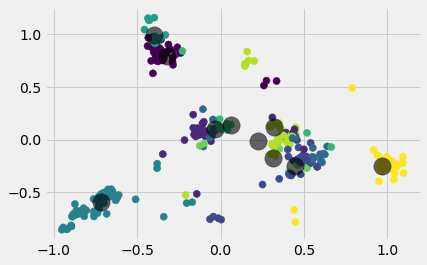

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(x)

pca = PCA()#n_components = 2)
pca_Y = pca.fit_transform(Y)
kmeans = KMeans(n_clusters=10, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(pca_Y)
prediction = kmeans.predict(pca_Y)


plt.scatter(pca_Y[:, 0], pca_Y[:, 1], c=prediction, s=50, cmap='viridis')

#corrected on how to get the center
#https://datascience.stackexchange.com/questions/76464/multidimensional-k-means-wiith-sklearn-centroids-problem-when-plotting
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);

In [6]:
print(prediction)

[1 0 4 7 5 2 0 0 8 4 2 4 0 4 7 8 8 8 0 2 8 3 0 2 2 4 8 1 6 4 9 2 3 4 2 4 2
 6 7 0 2 3 8 4 4 4 1 6 1 4 2 8 4 4 4 9 3 0 2 3 4 2 1 4 3 9 2 2 5 2 2 4 4 5
 0 8 8 6 0 2 4 1 2 4 8 4 2 2 8 1 2 1 8 0 8 8 2 1 0 4 4 1 4 4 4 9 9 4 2 2 6
 1 0 9 2 9 4 4 0 8 2 8 8 1 4 6 8 6 0 7 4 4 8 3 0 3 9 4 5 2 4 2 4 3 0 3 9 6
 1 8 1 5 0 3 1 1 9 0 8 8 8 6 3 4 4 0 4 4 3 8 1 2 1 4 0 8 0 0 1 1 9 9 5 4 8
 9 5 1 1 4 4 4 6 9 2 4 0 0 9 8 8 2 9 9 4 3 0 6 5 8 8 6 4 4 4 7 2 4 4 4 6 1
 0 0 0 4 5 8 9 0 9 3 1 3 4 5 5 0 4 4 2 1 0 0 9 6 9 1 1 2 6 1 4 4 5 4 8 8 9
 5 4 6 3 1 8 6 4 7 0 0 0 0 5 6 3 8 1 9 1 2 9 0 0 4 4 6 2 8 2 8 4 8 4 2 5 0
 2 5 2 1 0 4 5 2 9 8 8 2 3 1 0 4 2 3 2 4 7 1 6 8 3 8 0 1 1 2 4 8 9 9 8 1 0
 2 0 2 8 9 2 9 8 4 4 4 3 6 2 2 9 0 4 0 9 4 1 7 9 8 9 1 5 4 0 0 0 9 2 1 3 2
 4 0 3 2 8 1 4 0 4 1 4 4 4 3 2 8 4 6 9 9 4 2 4 9 0 1 4 9 4 2 4 8 5 8 3 0 3
 1 9 0 0 3 5 8 4 7 8 4 2 5 5 9 2 0 4 9 4 9 6 6]


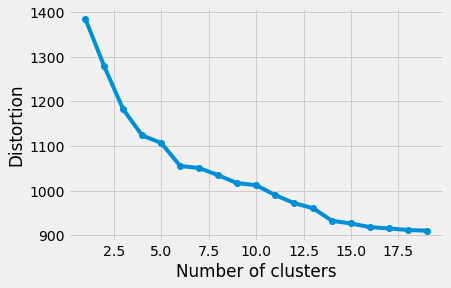

In [7]:
#https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
distortions = []
max_k = 20
for i in range(1, max_k):
    #doing the PCA is optional, feel free to comment out the next two lines
    #and change the km.fit(pca_Y) to km.fit(Y)
    pca = PCA()
    pca_Y = pca.fit_transform(Y)
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(pca_Y)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, max_k), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [8]:
labels = np.unique(prediction)
label_sets = []
label_counters = []

#for each cluster
for label in labels:
    
    #get the cluster idexes
    id_temp = np.where(prediction==label)[0] # indices for each cluster

    words = []
    for i in range(len(id_temp)):
        words+=x[i]
    #get by x most common articles
    #https://www.delftstack.com/howto/python/python-counter-most-common/
    counted_topics = Counter(words)
    top_topics = counted_topics.most_common(5)
    print(top_topics)
    
    label_counters.append(counted_topics)
    label_sets.append(set(words))
    
    
    '''
    words = []
    for i in id_temp[0]: #for every index in the cluster, i is the list of words
        for j in x: #for each word, add it to our word count
            for k in j:
                #print(k)
                words.append(k)
    
    '''

[('home-automation', 17), ('robotics', 15), ('internet-of-things', 12), ('display', 9), ('environmental-sensing', 7)]
[('home-automation', 13), ('display', 9), ('robotics', 9), ('internet-of-things', 9), ('remote-control', 5)]
[('home-automation', 17), ('robotics', 15), ('internet-of-things', 12), ('display', 10), ('environmental-sensing', 7)]
[('display', 8), ('internet-of-things', 7), ('home-automation', 7), ('robotics', 5), ('remote-control', 3)]
[('home-automation', 30), ('robotics', 22), ('internet-of-things', 20), ('display', 14), ('environmental-sensing', 11)]
[('display', 7), ('internet-of-things', 6), ('home-automation', 5), ('robotics', 4), ('remote-control', 3)]
[('display', 8), ('internet-of-things', 6), ('home-automation', 6), ('robotics', 4), ('remote-control', 3)]
[('display', 4), ('internet-of-things', 2), ('distance', 1), ('sensor', 1), ('ultrasonic', 1)]
[('home-automation', 15), ('robotics', 14), ('internet-of-things', 11), ('display', 9), ('remote-control', 6)]
[('h

In [9]:
#Get a combined set of all the labels to compare agaist

#https://www.pythonpool.com/learn-how-to-combine-sets-in-python/
label_sets
set_of_all_lables={}
for s in label_sets:
    set_of_all_lables=set(set_of_all_lables).union(s)




In [29]:
#https://www.geeksforgeeks.org/python-symmetric-difference-of-multiple-sets/
# Python3 code to demonstrate working of
# Symmetric Difference of Multiple sets
# Using Counter() + chain.from_iterable() 
from collections import Counter
from itertools import chain

#example with rare being the unique tag
#label_sets=[{'common','rare1','rare1','rare4'},{'common','common2','rare2','rare5'},{'common','rare3','common2'}]

# printing original list
#print("The original list is : " + str(label_sets))
  
# getting frequencies using Counter()
# from_iterable() flattens the list 
freq = Counter(chain.from_iterable(label_sets))
  
# getting frequency count 1 
res = {idx for idx in freq if freq[idx] == 1}

print()
# printing result
#all rare topics
print("Symmetric difference of multiple list : " + str(res))


Symmetric difference of multiple list : {'rare5', 'rare2', 'rare1', 'rare4', 'rare3'}


In [11]:
#find tags that are unique to each topic
for i in range(len(label_sets)):
    print('----')
    s = label_sets[i]
    #c = label_counters[i]
    
    # intersection
    print("Intersection :", s & res)
    
    #this keeps values that are above or below a certain value for each counter... could be useful
    #c_new = Counter({k: n for k, n in c.items() if n < 7})
    #c_new = Counter({k: n for k, n in c_new.items() if n > 1})
    #print(c_new)
    #print(c)


----
Intersection : set()
----
Intersection : set()
----
Intersection : set()
----
Intersection : set()
----
Intersection : {'data-collection', 'ble', 'smart-home', 'communication', 'launch-pad', 'office', 'solar', 'aquaponics', 'medical-device', 'greenhouse', 'home-monitoring', 'web-server', 'home-security', 'covid19', 'hydroponics', 'open-source-hardware', 'beginner', 'gps', 'camera', 'timer', 'entertainment-system', 'smart-mirror', 'chat', 'dc-motor'}
----
Intersection : set()
----
Intersection : set()
----
Intersection : set()
----
Intersection : set()
----
Intersection : set()


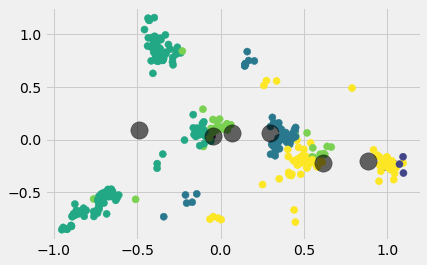

In [25]:
# Baysian guassain mixture model
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import MultiLabelBinarizer


mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(x)

pca = PCA()#n_components = 100)
Y_pca = pca.fit_transform(Y)
bgmm = BayesianGaussianMixture(n_components=6, random_state=42)
fitted = bgmm.fit(Y_pca)
prediction = bgmm.predict(Y_pca)


#https://towardsdatascience.com/gaussian-mixture-models-for-clustering-3f62d0da675
#bgmm = BayesianGaussianMixture(n_components=2, random_state=42).fit_predict(X)
#print(bgmm)
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=prediction, s=50, cmap='viridis')

#corrected on how to get the center
#https://datascience.stackexchange.com/questions/76464/multidimensional-k-means-wiith-sklearn-centroids-problem-when-plotting
centers = bgmm.means_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=300, alpha=0.6);


In [28]:
#what are our class distributions
print('class distribution')
for i in range(len(set(prediction))):
    print('class',i,':',list(prediction).count(i))
    
#print(prediction)

class distribution
class 0 : 2
class 1 : 5
class 2 : 70
class 3 : 198
class 4 : 47
class 5 : 108


# AIC vs BIC

https://stats.stackexchange.com/questions/577/is-there-any-reason-to-prefer-the-aic-or-bic-over-the-other

Your question implies that AIC and BIC try to answer the same question, which is not true. The AIC tries to select the model that most adequately describes an unknown, high dimensional reality. This means that reality is never in the set of candidate models that are being considered. On the contrary, BIC tries to find the TRUE model among the set of candidates. I find it quite odd the assumption that reality is instantiated in one of the models that the researchers built along the way. This is a real issue for BIC.

Nevertheless, there are a lot of researchers who say BIC is better than AIC, using model recovery simulations as an argument. These simulations consist of generating data from models A and B, and then fitting both datasets with the two models. Overfitting occurs when the wrong model fits the data better than the generating. The point of these simulations is to see how well AIC and BIC correct these overfits. Usually, the results point to the fact that AIC is too liberal and still frequently prefers a more complex, wrong model over a simpler, true model. At first glance these simulations seem to be really good arguments, but the problem with them is that they are meaningless for AIC. As I said before, AIC does not consider that any of the candidate models being tested is actually true. According to AIC, all models are approximations to reality, and reality should never have a low dimensionality. At least lower than some of the candidate models.

My recommendation is to use both AIC and BIC. Most of the times they will agree on the preferred model, when they don't, just report it.

If you are unhappy with both AIC and BIC and have free time to invest, look up Minimum Description Length (MDL), a totally different approach that overcomes the limitations of AIC and BIC. There are several measures stemming from MDL, like normalized maximum likelihood or the Fisher Information approximation. The problem with MDL is that its mathematically demanding and/or computationally intensive.

Still, if you want to stick to simple solutions, a nice way for assessing model flexibility (especially when the number of parameters are equal, rendering AIC and BIC useless) is doing Parametric Bootstrap, which is quite easy to implement. Here is a link to a paper on it.

Some people here advocate for the use of cross-validation. I personally have used it and don't have anything against it, but the issue with it is that the choice among the sample-cutting rule (leave-one-out, K-fold, etc) is an unprincipled one.


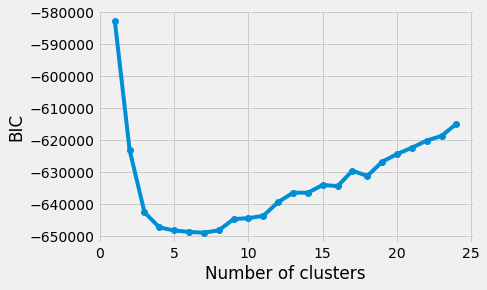

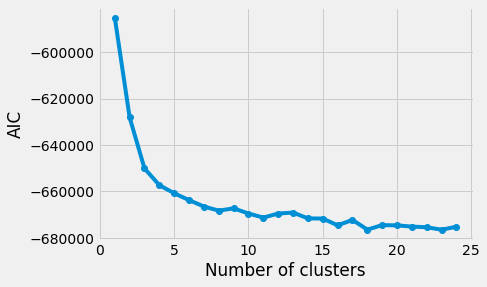

In [15]:
BICs = []
AICs = []
max_k = 25

from sklearn import mixture
for i in range(1, max_k):
    #bgmm = BayesianGaussianMixture(n_components=5, random_state=42)
    #doing the PCA is optional, feel free to comment out the next two lines
    #and change the bgmm.fit, bic, and aic to (Y) instead of (Y_pca)
    pca = PCA()
    pca_Y = pca.fit_transform(Y)
    bgmm = mixture.GaussianMixture(n_components=i, covariance_type='diag', n_init=50)
    bgmm.fit(pca_Y)
    #distortions.append(bgmm.bic(Y))
    BICs.append(bgmm.bic(pca_Y))
    AICs.append(bgmm.aic(pca_Y))

# plot
plt.plot(range(1, max_k), BICs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('BIC')
plt.show()

plt.plot(range(1, max_k), AICs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('AIC')
plt.show()

In [16]:
labels = np.unique(prediction)
label_sets = []
label_counters = []

#for each cluster
for label in labels:
    
    #get the cluster idexes
    id_temp = np.where(prediction==label)[0] # indices for each cluster

    words = []
    for i in range(len(id_temp)):
        words+=x[i]
    #get by x most common articles
    #https://www.delftstack.com/howto/python/python-counter-most-common/
    counted_topics = Counter(words)
    top_topics = counted_topics.most_common(5)
    print(top_topics)
    
    label_counters.append(counted_topics)
    label_sets.append(set(words))
    
    
    '''
    words = []
    for i in id_temp[0]: #for every index in the cluster, i is the list of words
        for j in x: #for each word, add it to our word count
            for k in j:
                #print(k)
                words.append(k)
    
    '''

[('distance', 1), ('sensor', 1), ('ultrasonic', 1), ('display', 1)]
[('display', 2), ('distance', 1), ('sensor', 1), ('ultrasonic', 1), ('assistive-technology', 1)]
[('home-automation', 24), ('robotics', 17), ('internet-of-things', 13), ('display', 11), ('environmental-sensing', 10)]
[('internet-of-things', 54), ('home-automation', 52), ('robotics', 49), ('display', 39), ('environmental-sensing', 27)]
[('home-automation', 13), ('robotics', 11), ('internet-of-things', 10), ('display', 9), ('remote-control', 5)]
[('home-automation', 33), ('robotics', 29), ('internet-of-things', 26), ('display', 17), ('environmental-sensing', 12)]


In [17]:
#Get a combined set of all the labels to compare agaist

#https://www.pythonpool.com/learn-how-to-combine-sets-in-python/
label_sets
set_of_all_lables={}
for s in label_sets:
    set_of_all_lables=set(set_of_all_lables).union(s)



In [78]:
##example with rare being the unique tag
#label_sets=[{'common','rare1','rare4'},{'common','rare2'},{'common','rare3'}]

In [18]:
#https://www.geeksforgeeks.org/python-symmetric-difference-of-multiple-sets/
# Python3 code to demonstrate working of
# Symmetric Difference of Multiple sets
# Using Counter() + chain.from_iterable() 
from collections import Counter
from itertools import chain


# printing original list
#print("The original list is : " + str(label_sets))
  
# getting frequencies using Counter()
# from_iterable() flattens the list 
freq = Counter(chain.from_iterable(label_sets))
  
# getting frequency count 1 
res = {idx for idx in freq if freq[idx] == 1}

print()
# printing result
#all rare topics
print("Symmetric difference of multiple list : " + str(res))


Symmetric difference of multiple list : {'plotter', 'signal-processing', 'simulation', 'eeprom', 'measurement', 'cheap', 'serial-communication', 'mapping', 'vehicle', 'lego', 'text-to-speech', 'retail-win10', 'moisture-sensor', 'education', 'brain', 'tachometer', 'facial-recognition', 'amazon-echo', 'energy-efficiency', 'voice-recognition', 'recording', 'useless-machine', 'data-streams', 'prosthetic', 'human-welfare', 'cnc', 'interface', 'arm', 'retail', 'industrial-automation', 'servo', 'actuator', 'portable', 'usb', 'ikea', 'data-logging', 'art', 'accelerometer', 'python', 'video', 'pir-sensor', 'gesture-control', 'mqtt', 'paper', 'epaper', 'emergency-response', 'sound', 'gesture', 'smart-city', 'motion', 'i2c', 'data-visualization', 'light-sensor', 'flip-dot', 'solar-tracker', 'oled', 'virtual-reality', 'emg', 'cellular', 'obstacle-avoidance', 'robots'}


In [19]:
#find tags that are unique to each topic
for i in range(len(label_sets)):
    print('----')
    s = label_sets[i]
    #c = label_counters[i]
    # intersection
    print(s)
    print("Intersection :", s & res)
    
    #this keeps values that are above or below a certain value for each counter... could be useful
    #c_new = Counter({k: n for k, n in c.items() if n < 7})     #get rid of times above 7
    #c_new = Counter({k: n for k, n in c_new.items() if n > 1}) #git rid of items below 1
    #print(c_new)
    #print(c)

----
{'display', 'ultrasonic', 'sensor', 'distance'}
Intersection : set()
----
{'display', 'robotics', 'embedded', 'distance', 'automation', 'health', 'ultrasonic', 'robot-arm', 'manufacturing', 'fpga', 'machine-learning', 'sensor', 'image-processing', 'internet-of-things', 'assistive-technology', 'computer-vision'}
Intersection : set()
----
{'led', 'sensor', 'food-and-drinks', 'lora', 'blinky-lights', 'smartphone', 'healthcare-win10', 'relay', 'bluetooth-low-energy', 'glove-control', 'gift', 'distance', 'fpga', 'lights', 'security-win10', 'water-level', 'embedded', 'automation', 'car', 'wifi', 'walking-robot', 'robotics', 'irrigation', 'robot-arm', 'ble', 'wearables', 'agriculture', 'maps', 'games', 'computer-vision', 'industrial-automation-win10', 'remote-control', 'humidity', 'plants', 'drones', 'farming', 'autonomous', 'weather', 'machine-learning', 'christmas', 'environmental-protection', 'clocks', 'artificial-intelligence', 'manufacturing', 'bluetooth', 'assistive-technology', 'd